**THE SPARKS FOUNDATION**<br>
Data Science and Business Analytics Internship(GRIP June 2021)<br>
Task 2: Prediction using Unsupervised ML<br>
Problem: To predict the optimum number of clusters from the given dataset and represent it visually<br>

By Joanne Anto

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#Loading the dataset

iris = datasets.load_iris()

#Converting into dataframe

iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()  # to see the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Checking for null values

iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [4]:
iris_df.shape

(150, 4)

In [5]:
# Checking for duplicate rows

iris_df.duplicated().sum()

1

In [6]:
#Dropping the duplicate row

iris_df.drop_duplicates(inplace=True)

In [7]:
iris_df.shape

(149, 4)

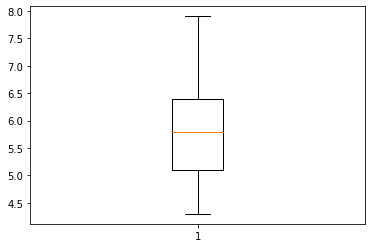

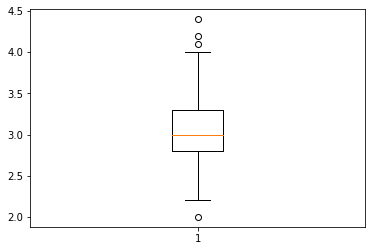

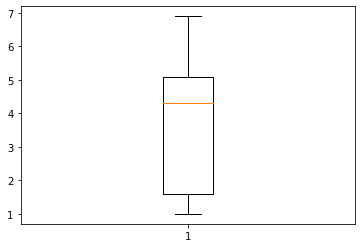

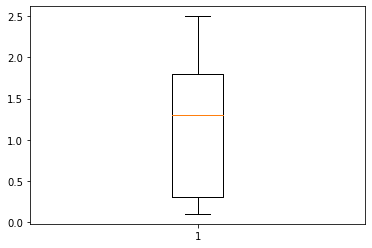

In [8]:
# Checking for outliers

for i in iris_df.columns:
  if iris_df[i].dtype=='float64':
    plt.boxplot(iris_df[i])
    plt.show()

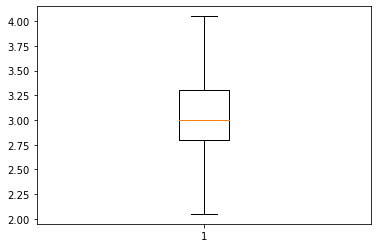

In [9]:
# Removing outliers using IQR method

Q1,Q3=np.percentile(iris_df['sepal width (cm)'],[25,75])
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
iris_df['sepal width (cm)']=iris_df['sepal width (cm)'].apply(lambda x: lower if x < lower else upper if x > upper else x)
plt.boxplot(x=iris_df['sepal width (cm)'])
plt.show()



Finding the optimum number of clusters needed 

In [10]:
x = iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]                            # Within Cluster Sum of Squares
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

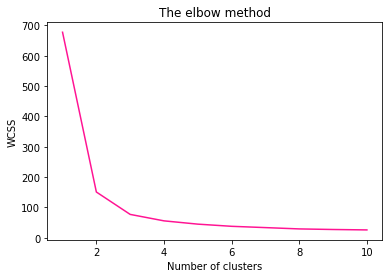

In [11]:
# plotting the results inorder to find the 'The elbow'

plt.plot(range(1,11),wcss,'deeppink')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From this graph, we can see exactly where the elbow occurs.That is the point from where the WCSS doesn't decrease significantly with every iteration<br>

In this graph, the elbow seems to be where the number of clusters is 3. So we take K as 3


In [12]:
# Clustering

kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
y = kmeans.fit_predict(x)

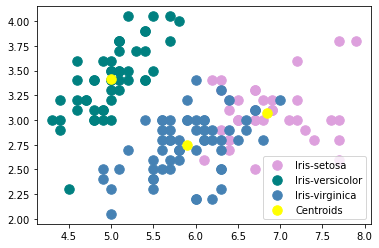

In [13]:
# Visualising the clusters on the first two columns

plt.scatter(x[y==0,0],x[y==0,1],s=90,c='plum',label='Iris-setosa')
plt.scatter(x[y==1,0],x[y==1,1],s=90,c='teal',label='Iris-versicolor')
plt.scatter(x[y==2,0],x[y==2,1],s=90,c='steelblue',label='Iris-virginica')

#Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=90,c='yellow',label='Centroids')
plt.legend()


###Thus we have clustered the given Iris dataset into three clusters###

**Thank you !!!**